# Movie Recommendation System
Recommendation System is a system that predicts or filter preferences according to the user’s choices. 

Recommendation systems produces a list of recommendations in two ways – 
1. Content-Based Filtering: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on the user’s past preferences.

2. Collaborative Filtering: Collaborative filtering approaches build a model from the user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that users may have an interest in.

###  Importing all necessary libraries


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Importing Datasets


In [76]:
movies_metadata=r"C:\Users\kamat\Downloads\theMoviesDataset\movies_metadata.csv"
movies_keywords=r"C:\Users\kamat\Downloads\theMoviesDataset\keywords.csv"
movies_ratings=r"C:\Users\kamat\Downloads\theMoviesDataset\ratings.csv"
movies_ratings_small=r"C:\Users\kamat\Downloads\theMoviesDataset\ratings_small.csv"
movies_links=r"C:\Users\kamat\Downloads\theMoviesDataset\links.csv"
movies_links_small=r"C:\Users\kamat\Downloads\theMoviesDataset\links_small.csv"
movies_credits=r"C:\Users\kamat\Downloads\theMoviesDataset\credits.csv"



### Loading the data

In [77]:

# Load the file into a pandas DataFrame

df=pd.read_csv(movies_metadata)
print(df)


       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 

C:\Users\kamat\AppData\Local\Temp\ipykernel_6012\3504863668.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(movies_metadata)


In [78]:
keywords=pd.read_csv(movies_keywords)
print(keywords)

           id                                           keywords
0         862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2       15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3       31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4       11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
...       ...                                                ...
46414  439050             [{'id': 10703, 'name': 'tragic love'}]
46415  111109  [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416   67758                                                 []
46417  227506                                                 []
46418  461257                                                 []

[46419 rows x 2 columns]


In [79]:
ratings=pd.read_csv(movies_ratings)
print(ratings)

          userId  movieId  rating   timestamp
0              1      110     1.0  1425941529
1              1      147     4.5  1425942435
2              1      858     5.0  1425941523
3              1     1221     5.0  1425941546
4              1     1246     5.0  1425941556
...          ...      ...     ...         ...
26024284  270896    58559     5.0  1257031564
26024285  270896    60069     5.0  1257032032
26024286  270896    63082     4.5  1257031764
26024287  270896    64957     4.5  1257033990
26024288  270896    71878     2.0  1257031858

[26024289 rows x 4 columns]


In [80]:
ratings_small=pd.read_csv(movies_ratings_small)
print(ratings_small)

        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]


In [81]:
links=pd.read_csv(movies_links)
print(links)

       movieId   imdbId    tmdbId
0            1   114709     862.0
1            2   113497    8844.0
2            3   113228   15602.0
3            4   114885   31357.0
4            5   113041   11862.0
...        ...      ...       ...
45838   176269  6209470  439050.0
45839   176271  2028550  111109.0
45840   176273   303758   67758.0
45841   176275     8536  227506.0
45842   176279  6980792  461257.0

[45843 rows x 3 columns]


In [82]:
links_small=pd.read_csv(movies_links_small)
print(links_small)

      movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9120   162672  3859980  402672.0
9121   163056  4262980  315011.0
9122   163949  2531318  391698.0
9123   164977    27660  137608.0
9124   164979  3447228  410803.0

[9125 rows x 3 columns]


In [83]:
credits=pd.read_csv(movies_credits)
print(credits)

                                                    cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
45474  [{'cast_id': 2, 'character': '', 'credit_id': ...   
45475                                                 []   

                                                    crew      id  
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862  
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844  
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602  
3      [{'c

## Content Based Filtering
In this we will be using df dataframe

### Analysing Data and Data Cleaning

In [84]:
# Information regarding the Dataframe 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [85]:
# Printing datatypes of columns
print(df.dtypes)

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


In [86]:
# Gives the number of null values in each column of dataframe
print(df.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


We will be considering genres,title,overview to make another tags column in which we will be checking similarities between them and recommend movies. Hence it is necessary to handle the missing data,duplicates in these columns

In [87]:
# Printing number of duplicates in title column
print(df['title'].duplicated().sum())


3188


In [88]:
# There are duplicates in title column and we are removing them. We are dropping rows containing empty cells in title and overview column
df=df.drop_duplicates(subset='title')
df.dropna(subset=['title','overview'],inplace=True)

# Finally we need only id, genres,title and overview for our analysis. Hence we will only keep these columns in our dataframe
columns_to_keep=['id','genres','title','overview']
df=df[columns_to_keep]
print(df)

           id                                             genres  \
0         862  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1        8844  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2       15602  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3       31357  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4       11862                     [{'id': 35, 'name': 'Comedy'}]   
...       ...                                                ...   
45459  222848           [{'id': 878, 'name': 'Science Fiction'}]   
45461  439050  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462  111109                      [{'id': 18, 'name': 'Drama'}]   
45464  227506                                                 []   
45465  461257                                                 []   

                             title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exh

In genre column in each element we require only the name part and here it is stored as string in our data. Hence we are first converting it into list of dictionaries and then
accessing names from them and converting into list of strings.

In [89]:
import ast

# Function which converts strings to lists of dictionaries
def str_to_list_of_dicts(x):
    if isinstance(x, str):  #isinstance() checks that type of x is str or not
        
        # ast.literal_eval converts string to actual list
        list_of_dicts = ast.literal_eval(x)
        return list_of_dicts
    elif isinstance(x, list):
        return x
    return []

     
# We are applying this function to genres column of dataframe
df['genres'] = df['genres'].apply(str_to_list_of_dicts)

# Function which extracts name values from list of dictionaries

def extract_names(list_of_dicts):
    return [d['name'] for d in list_of_dicts if type(d) and 'name' in d]

# We are applying this function to genres column of dataframe
df['genres'] = df['genres'].apply(extract_names)

print(df)

           id                        genres                        title  \
0         862   [Animation, Comedy, Family]                    Toy Story   
1        8844  [Adventure, Fantasy, Family]                      Jumanji   
2       15602             [Romance, Comedy]             Grumpier Old Men   
3       31357      [Comedy, Drama, Romance]            Waiting to Exhale   
4       11862                      [Comedy]  Father of the Bride Part II   
...       ...                           ...                          ...   
45459  222848             [Science Fiction]              Caged Heat 3000   
45461  439050               [Drama, Family]                       Subdue   
45462  111109                       [Drama]          Century of Birthing   
45464  227506                            []             Satan Triumphant   
45465  461257                            []                     Queerama   

                                                overview  
0      Led by Woody, Andy's 

### Visualization of Data

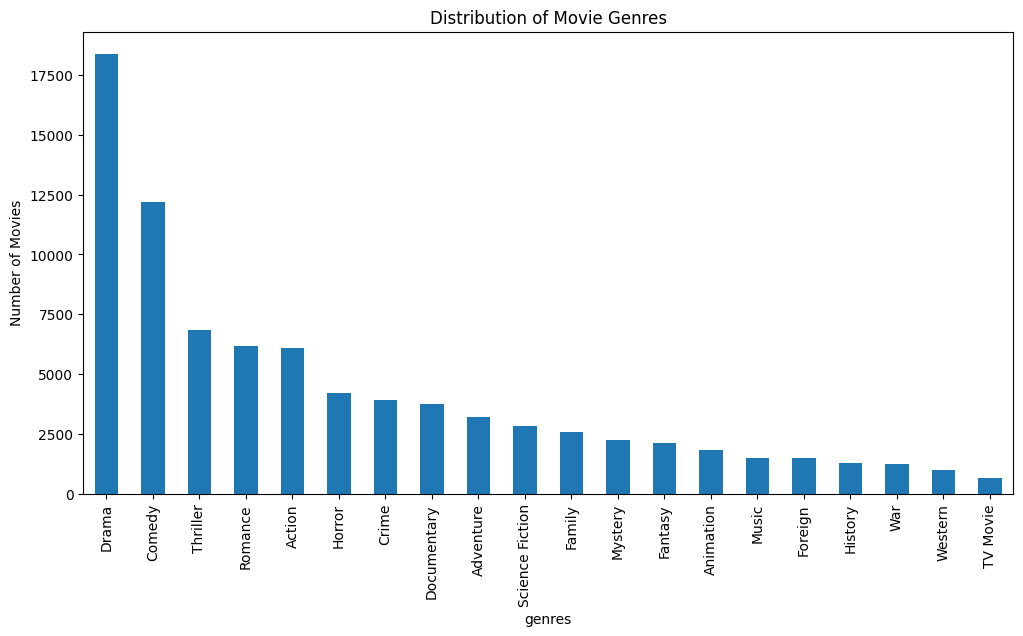

In [90]:
# Plotting distribution of movie genres

exploded_genres=df.explode('genres')
genre_counts = exploded_genres['genres'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.show()


In [91]:
# Join function concatenates list of strings into a single string. We are applying this to genres column of dataframe
df['genres']=df['genres'].apply(' '.join)
print(df)

           id                    genres                        title  \
0         862   Animation Comedy Family                    Toy Story   
1        8844  Adventure Fantasy Family                      Jumanji   
2       15602            Romance Comedy             Grumpier Old Men   
3       31357      Comedy Drama Romance            Waiting to Exhale   
4       11862                    Comedy  Father of the Bride Part II   
...       ...                       ...                          ...   
45459  222848           Science Fiction              Caged Heat 3000   
45461  439050              Drama Family                       Subdue   
45462  111109                     Drama          Century of Birthing   
45464  227506                                       Satan Triumphant   
45465  461257                                               Queerama   

                                                overview  
0      Led by Woody, Andy's toys live happily in his ...  
1      When sibli

In [92]:
# We are preparing a tags column and we will be using this to check similarity
df['tags']=df['genres']+' '+df['overview']
print(df)

           id                    genres                        title  \
0         862   Animation Comedy Family                    Toy Story   
1        8844  Adventure Fantasy Family                      Jumanji   
2       15602            Romance Comedy             Grumpier Old Men   
3       31357      Comedy Drama Romance            Waiting to Exhale   
4       11862                    Comedy  Father of the Bride Part II   
...       ...                       ...                          ...   
45459  222848           Science Fiction              Caged Heat 3000   
45461  439050              Drama Family                       Subdue   
45462  111109                     Drama          Century of Birthing   
45464  227506                                       Satan Triumphant   
45465  461257                                               Queerama   

                                                overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When sib

### Text Preprocessing

We are importing nltk(Natural Language Toolkit) for text processing

nltk.download('punkt') downloads tokenizer models which are used for splitting text into words and sentences

nltk.download('averaged_perceptron_tagger') Downloads the POS (part-of-speech) tagger models,which are used for tagging each word in a sentence with its part of speech.

nltk.download('wordnet'): Downloads the WordNet lexical database, which is used for lemmatization (reducing words to their base or root form).


In [93]:
import nltk 

nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet') 


from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() #Reduces words to their base form

from nltk.corpus import stopwords 
nltk.download('stopwords') # stopwords are words like "the","a","is" which are not useful and hence removed in text processing
stop_words = set(stopwords.words('english')) 

VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'} # These are tags for various forms of verbs(like present , past participle)


def preprocess_sentences(text): 
    text = text.lower()     # Converts input text to lowercase
    temp_sent =[] 
    words = nltk.word_tokenize(text) # Tokenises text into words
    tags = nltk.pos_tag(words) # Tags each word with its part of speech
	
    # Basically we are lemmatizing

    for i, word in enumerate(words): 
	    if tags[i][1] in VERB_CODES: 
		    lemmatized = lemmatizer.lemmatize(word, 'v') 
	    else: 
		    lemmatized = lemmatizer.lemmatize(word) 
	    if lemmatized not in stop_words and lemmatized.isalpha(): 
		    temp_sent.append(lemmatized) 
		
    # We are joing processed words into string. 

    finalsent = ' '.join(temp_sent) 
	
    #replace function basically replaces those contracted words in the left to the words in the right
    finalsent = finalsent.replace("n't", " not") 
    finalsent = finalsent.replace("'m", " am") 
    finalsent = finalsent.replace("'s", " is") 
    finalsent = finalsent.replace("'re", " are") 
    finalsent = finalsent.replace("'ll", " will") 
    finalsent = finalsent.replace("'ve", " have") 
    finalsent = finalsent.replace("'d", " would") 
    return finalsent 

# Now we are applying this to preprocess tags

df['tags']= df['tags'].apply(preprocess_sentences) 
print(df.head()) 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kamat\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kamat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      id                    genres                        title  \
0    862   Animation Comedy Family                    Toy Story   
1   8844  Adventure Fantasy Family                      Jumanji   
2  15602            Romance Comedy             Grumpier Old Men   
3  31357      Comedy Drama Romance            Waiting to Exhale   
4  11862                    Comedy  Father of the Bride Part II   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                                                tags  
0  animation comedy family lead woody andy toy li...  
1  adventure fantasy family sibling judy peter di...  
2  romance comedy family wedding reignite ancient...  
3  comedy drama romance cheat mistreat s

In [94]:
# We now only need id ,title and tags for our analysis. Hence we only include them in our dataframe
df=df[['id','title','tags']]
print(df)

           id                        title  \
0         862                    Toy Story   
1        8844                      Jumanji   
2       15602             Grumpier Old Men   
3       31357            Waiting to Exhale   
4       11862  Father of the Bride Part II   
...       ...                          ...   
45459  222848              Caged Heat 3000   
45461  439050                       Subdue   
45462  111109          Century of Birthing   
45464  227506             Satan Triumphant   
45465  461257                     Queerama   

                                                    tags  
0      animation comedy family lead woody andy toy li...  
1      adventure fantasy family sibling judy peter di...  
2      romance comedy family wedding reignite ancient...  
3      comedy drama romance cheat mistreat step woman...  
4      comedy george bank recover daughter wedding re...  
...                                                  ...  
45459  science fiction year ad wor

### Hashing Vectorizer

It converts a collection of text documents to a matrix of token occurrences using hashing. It hashes words into fixed number of features using hash map.It doesnt store vocabulary and hence it is memory efficient than count vectorizer and TF-IDF Vectorizer. Although there is a disadvantage of hash collisions they can be reduced by increasing number of features but it will cost some memory. This is useful while handling large datasets. For this we will be using HashingVectorizer from sklearn library 

In [95]:
from sklearn.feature_extraction.text import HashingVectorizer
# n_features represent fixed number of features and alternate_sign=True reduces number of hash collisions. It does this by alternating sign of hashed values and it helps
# to cancel out effect of collisions
hashing_vectorizer = HashingVectorizer(n_features=2**16, alternate_sign=True)
tfidf_matrix_hashed = hashing_vectorizer.fit_transform(df['tags'])
print(tfidf_matrix_hashed)

  (0, 2891)	-0.13608276348795434
  (0, 4338)	-0.13608276348795434
  (0, 5101)	-0.13608276348795434
  (0, 5164)	-0.13608276348795434
  (0, 6050)	-0.408248290463863
  (0, 17665)	-0.13608276348795434
  (0, 18788)	-0.13608276348795434
  (0, 21953)	0.13608276348795434
  (0, 23799)	-0.13608276348795434
  (0, 23856)	-0.13608276348795434
  (0, 24217)	0.13608276348795434
  (0, 29426)	-0.13608276348795434
  (0, 31004)	0.13608276348795434
  (0, 31024)	0.13608276348795434
  (0, 31875)	-0.13608276348795434
  (0, 35175)	0.13608276348795434
  (0, 38082)	-0.13608276348795434
  (0, 39480)	0.13608276348795434
  (0, 41472)	0.13608276348795434
  (0, 41962)	0.13608276348795434
  (0, 42517)	-0.408248290463863
  (0, 44379)	0.13608276348795434
  (0, 44877)	-0.13608276348795434
  (0, 47716)	-0.408248290463863
  (0, 48725)	-0.13608276348795434
  :	:
  (41360, 59876)	-0.28867513459481287
  (41360, 63125)	-0.09622504486493763
  (41360, 64110)	0.5773502691896257
  (41360, 65142)	-0.19245008972987526
  (41360, 6535

### Cosine Similarity

It tells us how similar two texts are by finding similarity between vectors of those two texts returned by hashing vectorizer(in this context) by finding cosine of angle between two vectors


In [96]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(tfidf_matrix_hashed, tfidf_matrix_hashed)
print(sim)


[[1.         0.03928371 0.04415108 ... 0.         0.02618914 0.        ]
 [0.03928371 1.         0.04682929 ... 0.04811252 0.02777778 0.03227486]
 [0.04415108 0.04682929 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.04811252 0.         ... 1.         0.         0.        ]
 [0.02618914 0.02777778 0.         ... 0.         1.         0.02151657]
 [0.         0.03227486 0.         ... 0.         0.02151657 1.        ]]


In [97]:

# Function which recommends movies based on cosine similarity
def recommend_movies(title, exclude_indices=[]):
    # Get the index of the movie that matches with the title
    idx = df[df['title'] == title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filter out the excluded indices
    sim_scores = [score for score in sim_scores if score[0] not in exclude_indices]
    
    num_recommendations = 5 - len(exclude_indices)
    
    # Get the scores of the most similar movies
    sim_scores = sim_scores[:num_recommendations]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return most similar movies
    return df['title'].iloc[movie_indices]




In [98]:
# import difflib
# def close_movies(movie):
#     find_close_match=difflib.get_close_matches(movie,df['title'].values,n=5)
#     print(find_close_match)

# Define the close_movies function
import difflib
def close_movies(movie):
    return difflib.get_close_matches(movie, df['title'].values, n=3)

# def recommend_combined(movie):
#     close_matches = close_movies(movie)
#     if close_matches:
#         print("Close matches found:", close_matches)
#         # Get the indices of the close matches
#         close_match_indices = df[df['title'].isin(close_matches)].index
#         # Get additional recommendations from recommend_movies, excluding the close matches
#         additional_recommendations = recommend_movies(movie, exclude_indices=close_match_indices)
#         print("Additional recommendations:", additional_recommendations.tolist())
#         # Combine the two lists
#         combined_recommendations = close_matches + additional_recommendations.tolist()
#         return combined_recommendations
#     else:
#         print("No close matches found. Recommending similar movies:")
#         # If no close matches found, recommend movies using recommend_movies function
#         return recommend_movies(movie, exclude_indices=[])

def recommend_combined(movie):
    close_matches = close_movies(movie)
    if close_matches:
        print("Close matches found:", close_matches)
        # Get the indices of the close matches
        close_match_indices = df[df['title'].isin(close_matches)].index.tolist()
        # Get additional recommendations from recommend_movies, excluding the close matches
        additional_recommendations = recommend_movies(movie, exclude_indices=close_match_indices)
        print("Additional recommendations:", additional_recommendations.tolist())
        # Combine the two lists, ensuring no duplicates
        combined_recommendations = close_matches + [rec for rec in additional_recommendations if rec not in close_matches]
        return combined_recommendations
    else:
        print("No close matches found. Recommending similar movies:")
        # If no close matches found, recommend movies using recommend_movies function
        return recommend_movies(movie, exclude_indices=[]).tolist()

In [99]:
movie=input("Enter the movie which you want to watch and we will recommend similar movies")
print(recommend_combined(movie))

Close matches found: ['Toy Story', 'Toy Story 3', 'Toy Story 2']
Additional recommendations: ['Toy Story 3', 'Toy Story 2']
['Toy Story', 'Toy Story 3', 'Toy Story 2']


## Collaborative Filtering

In [100]:
# Observing the ratings dataframe
ratings=pd.read_csv(movies_ratings)
print(ratings)

          userId  movieId  rating   timestamp
0              1      110     1.0  1425941529
1              1      147     4.5  1425942435
2              1      858     5.0  1425941523
3              1     1221     5.0  1425941546
4              1     1246     5.0  1425941556
...          ...      ...     ...         ...
26024284  270896    58559     5.0  1257031564
26024285  270896    60069     5.0  1257032032
26024286  270896    63082     4.5  1257031764
26024287  270896    64957     4.5  1257033990
26024288  270896    71878     2.0  1257031858

[26024289 rows x 4 columns]


### Analysing Data and Data Cleaning

In [101]:
# Gives information regarding ratings dataframe
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB
None


In [102]:
# Gives datatypes of ratings dataframe
print(ratings.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [103]:
# Gives number of empty cells in each column of ratings dataframe
print(ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [104]:
# If we observe carefully in df id is of string datatype and here movieId is an int. Hence we are typecasting so as to have no problem further
# We have dropped some rows with duplicate title in df. Hence we dont have their id. Hence we are dropping those rows in ratings dataframe as we have no problem further
df['id'] = df['id'].astype(int)
ratings=ratings[ratings['movieId'].isin(df['id'])]

In [105]:
# Statistical analysis of ratings data
n_ratings = len(ratings)
n_movies = len(ratings['movieId'].unique())
n_users = len(ratings['userId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")


Number of ratings: 10839361
Number of unique movieId's: 6961
Number of unique users: 265410
Average ratings per user: 40.84
Average ratings per movie: 1557.16


In [106]:
# This gives the data of user frequency
user_freq = ratings[['userId', 'movieId']].groupby('userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
print(user_freq)


        userId  n_ratings
0            1         11
1            2         15
2            3          8
3            4         18
4            5         10
...        ...        ...
265405  270892         35
265406  270893         79
265407  270894         58
265408  270895         16
265409  270896        121

[265410 rows x 2 columns]


In [107]:
# Finding mean rating of each movie :
mean_rating = ratings.groupby('movieId')[['rating']].mean()
print(mean_rating)


           rating
movieId          
2        3.236953
3        3.175550
5        3.079565
6        3.841764
11       3.660591
...           ...
176077   3.500000
176085   3.000000
176143   3.500000
176167   3.000000
176273   1.000000

[6961 rows x 1 columns]


In [108]:
#Finding Lowest rated movie
lowest_rated = mean_rating['rating'].idxmin()
print(df.loc[df['id'] == lowest_rated])
#Finding Highest rated movie
highest_rated = mean_rating['rating'].idxmax()
print(df.loc[df['id'] == highest_rated])


          id            title  \
13373  97915  Point of Order!   

                                                    tags  
13373  documentary point order compile tv footage hea...  
         id      title                                               tags
4723  27396  Brannigan  action crime drama mystery thriller jim branni...


In [109]:
# show number of people who rated movies rated movie highest
print(ratings[ratings['movieId']==highest_rated])
# show number of people who rated movies rated movie lowest
print(ratings[ratings['movieId']==lowest_rated])


          userId  movieId  rating   timestamp
24906400  258955    27396     5.0  1501406446
          userId  movieId  rating   timestamp
13380524  139114    97915     0.5  1351785327


### Visualizations of Data

userId        265410
movieId         6961
rating            10
timestamp    8820478
dtype: int64


C:\Users\kamat\AppData\Local\Temp\ipykernel_6012\3971089183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings.columns, y=ratings.nunique(axis=0), palette="Blues_d")


<Axes: xlabel='None', ylabel='None'>

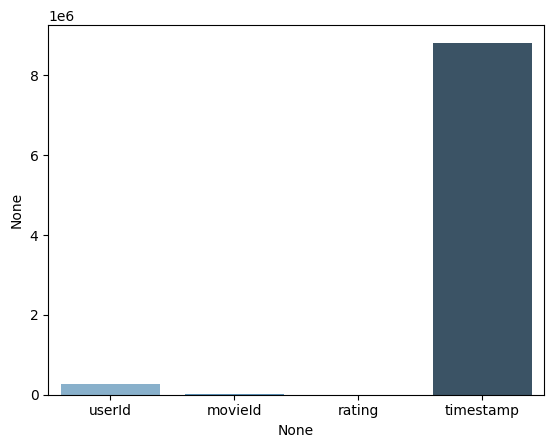

In [110]:
# This barplot basically gives us an idea to compare number of unique values across different columns of ratings dataframe
print(ratings.nunique(axis=0))
sns.barplot(x=ratings.columns, y=ratings.nunique(axis=0), palette="Blues_d")


Text(0.5, 1.0, 'top 50 movies that are most rated')

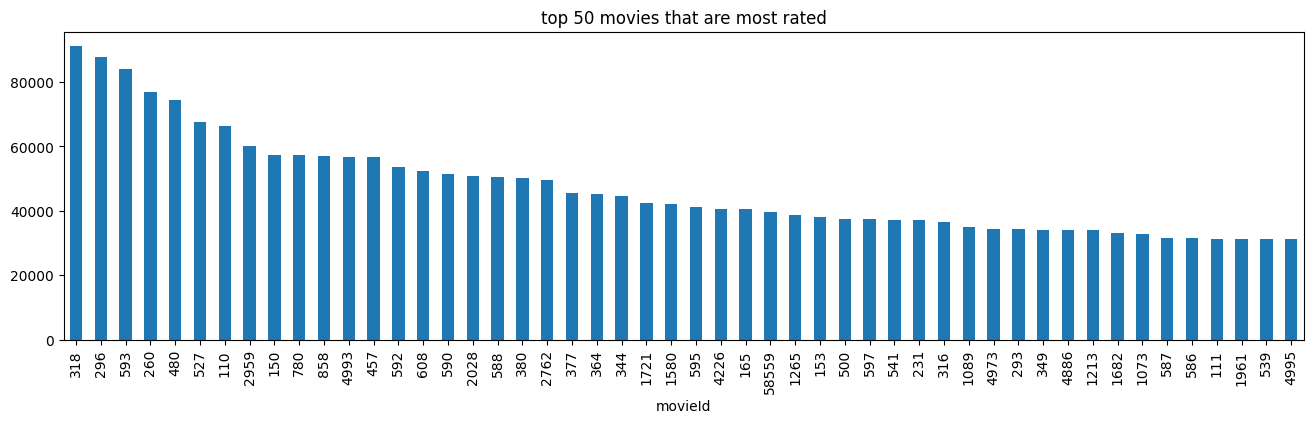

In [111]:
#gives top 50 movies that are most rated which indicates they are they are most popular or frequently watched

plt.figure(1, figsize=(16,4))
ratings['movieId'].value_counts()[:50].plot(kind='bar') 
plt.title('top 50 movies that are most rated')


Text(0.5, 1.0, 'Top 50 Active users')

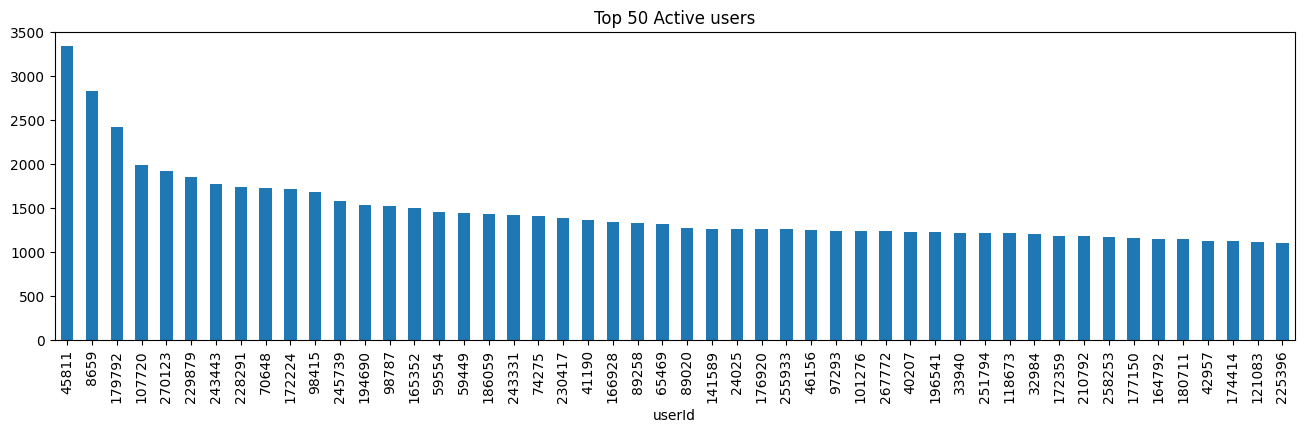

In [112]:
#gives top 50 users who are most active

plt.figure(2, figsize=(16,4))
ratings['userId'].value_counts()[:50].plot(kind='bar')
plt.title("Top 50 Active users")


Text(0.5, 1.0, 'Distribution of Ratings')

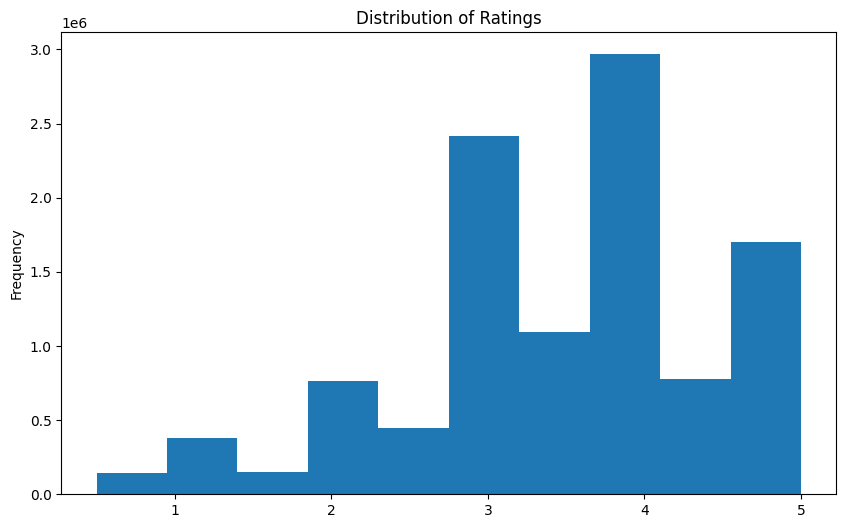

In [113]:
# Gives distribution of ratings

plt.figure(3, figsize=(10,6))
ratings['rating'].plot(kind='hist')
plt.title("Distribution of Ratings")


Text(0.5, 1.0, 'ratings per user')

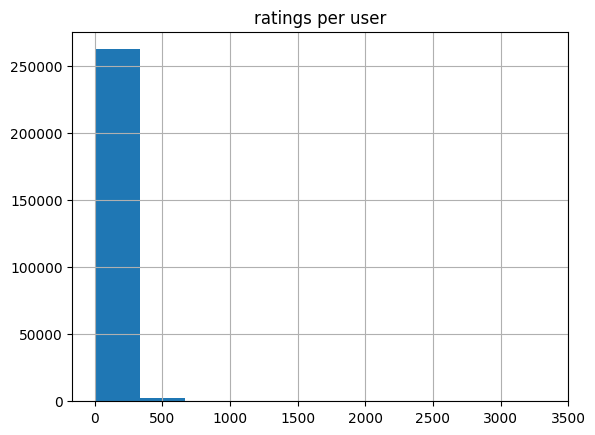

In [114]:
#plotting Histogram of ratings per user
ratings_per_user = ratings.groupby('userId')['movieId'].count()
ratings_per_user.hist() # Method to plot histogram for a Pandas Series
plt.title('ratings per user')

Text(0.5, 1.0, 'ratings per movie')

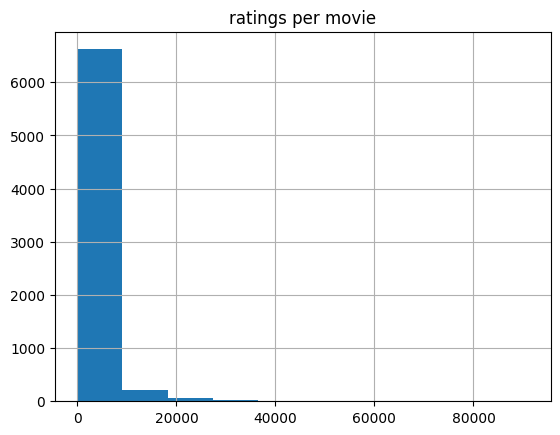

In [115]:
# Plotting histogram of ratings per movie
ratings_per_movie = ratings.groupby('movieId')['userId'].count() 
ratings_per_movie.hist()
plt.title('ratings per movie')

### User-Item Matrix Creation

In [119]:
# Now we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix

def create_matrix(df1):
    n=len(df1['userId'].unique())
    m=len(df1['movieId'].unique())

    # Maps Ids to indices

    user_mapper=dict(zip(np.unique(df1['userId']),list(range(n))))
    movie_mapper=dict(zip(np.unique(df1['movieId']),list(range(m))))

    # Maps indices to Ids

    user_inv_mapper=dict(zip(list(range(n)),np.unique(df1['movieId'])))
    movie_inv_mapper=dict(zip(list(range(m)),np.unique(df1['movieId'])))

    # Obtaining indexes

    user_index=[user_mapper[i] for i in df1['userId']]
    movie_index=[movie_mapper[i] for i in df1['movieId']]

    X=csr_matrix((df1['rating'],(movie_index,user_index)),shape=(m,n))

    return X,user_mapper,movie_mapper,user_inv_mapper,movie_inv_mapper


X,user_mapper,movie_mapper,user_inv_mapper,movie_inv_mapper=create_matrix(ratings)
print(X)

  (0, 23)	3.0
  (0, 24)	3.0
  (0, 33)	3.0
  (0, 42)	4.0
  (0, 47)	4.5
  (0, 60)	2.0
  (0, 72)	4.0
  (0, 89)	4.0
  (0, 109)	3.0
  (0, 117)	2.5
  (0, 123)	5.0
  (0, 159)	4.0
  (0, 175)	5.0
  (0, 178)	3.0
  (0, 188)	3.0
  (0, 215)	2.0
  (0, 222)	4.0
  (0, 224)	3.0
  (0, 226)	3.0
  (0, 228)	2.0
  (0, 258)	3.0
  (0, 264)	4.0
  (0, 284)	3.0
  (0, 295)	3.0
  (0, 303)	4.0
  :	:
  (6943, 67606)	3.5
  (6944, 48890)	4.0
  (6944, 164842)	3.5
  (6944, 174699)	3.5
  (6945, 164842)	3.0
  (6946, 164842)	2.5
  (6947, 113258)	3.0
  (6947, 255214)	5.0
  (6948, 15861)	0.5
  (6948, 243639)	5.0
  (6949, 15861)	0.5
  (6949, 243639)	5.0
  (6950, 44895)	2.5
  (6950, 60030)	3.0
  (6951, 141523)	1.5
  (6952, 258320)	3.5
  (6953, 203861)	1.0
  (6954, 16228)	2.0
  (6955, 247352)	3.0
  (6956, 34483)	3.5
  (6957, 146712)	3.0
  (6957, 196998)	3.0
  (6958, 34483)	3.5
  (6959, 174699)	3.0
  (6960, 262393)	1.0


### Movie Similarity Analysis by KNN

In [117]:
# Find similar movies using KNN
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id,X,k,metric='cosine', show_distance=False):
    neighbour_ids=[]    # List to store IDs of similar movies

    movie_ind=movie_mapper[movie_id]    # Getting movie index from movie_mapper
    movie_vec=X[movie_ind]              # Getting the feature vector
    
    # Increasing k by 1 as the same movie will be the closest neighbour
    
    k+=1

    # Applying knn to it

    knn=NearestNeighbors(n_neighbors=k,algorithm='brute',metric=metric)
    knn.fit(X)
    movie_vec=movie_vec.reshape(1,-1)

    # Find k nearest neighbours of the movie
    neighbour=knn.kneighbors(movie_vec,return_distance=show_distance)

    # Extracting neighbour indices and store in neighbour_ids
    for i in range(0,k):
        n=neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])

    #Removing first neighbour as it is the movie itself
    neighbour_ids.pop(0)
    return neighbour_ids

# Creating a dictionary which maps movie IDs to movie titles using zip function
movie_titles=dict(zip(df['id'],df['title']))


In [118]:

# movieId = 862
watched_movie=input("Enter the name of movie you have watched")

# Extracting movie id and ids of similar movies and recommending them
movieId=df[df['title']==watched_movie].iloc[0]['id']
 
similar_ids = find_similar_movies(movieId, X, k=5)
movie_title = movie_titles[(movieId)]
 
print(f"Since you watched {movie_title} you may like:")
for i in similar_ids:
    print(movie_titles[i])
    

Since you watched Toy Story you may like:
Born into Brothels
WarGames
Night and Fog
The Wizard of Oz
Amores perros
